# Predict duration of trip for taxis

### Import what is needed

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
import holidays

### Load Data

In [2]:
# Import Data
trips = pd.read_csv("train.csv")

#### Divide between test and train set

In [3]:
#trips, test_set = train_test_split(raw_data, test_size=0.2, random_state=42)

### Compute Distance travelled from latitudes and longuitudes

In [4]:
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [5]:
trips["distance_to_travel"]=haversine_np(trips["pickup_latitude"],
                                             trips["pickup_longitude"],
                                             trips["dropoff_latitude"],
                                             trips["dropoff_longitude"])

### Work on date & time

#### Split date and time

In [6]:
# Transform pickup_datetime into a datetime object
trips["pickup_datetime"] = trips["pickup_datetime"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
# Get date
trips['pickup_date'] = [d.date() for d in trips["pickup_datetime"]]
# Get Time
trips['pickup_time'] = [d.time() for d in trips['pickup_datetime']]


#### Get dummies var for weekdays

In [7]:
trips['weekdays'] = [d.strftime('%a') for d in trips["pickup_datetime"]]
trips = pd.concat([trips,pd.get_dummies(trips["weekdays"])], axis=1)
trips.drop("weekdays", axis=1)
trips.drop("pickup_datetime", axis=1)

,id,vendor_id,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,pickup_date,pickup_time,weekdays,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,id2875421,2,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,2016-03-14,17:24:55,Monday,0,1,0,0,0,0,0
1,id2377394,1,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,2016-06-12,00:43:35,Sunday,0,0,0,1,0,0,0
2,id3858529,2,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,...,2016-01-19,11:35:24,Tuesday,0,0,0,0,0,1,0
3,id3504673,2,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,2016-04-06,19:32:31,Wednesday,0,0,0,0,0,0,1
4,id2181028,2,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,2016-03-26,13:30:55,Saturday,0,0,1,0,0,0,0
5,id0801584,2,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,...,2016-01-30,22:01:40,Saturday,0,0,1,0,0,0,0
6,id1813257,1,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,...,2016-06-17,22:34:59,Friday,1,0,0,0,0,0,0
7,id1324603,2,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,...,2016-05-21,07:54:58,Saturday,0,0,1,0,0,0,0
8,id1301050,1,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,...,2016-05-27,23:12:23,Friday,1,0,0,0,0,0,0
9,id0012891,2,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,...,2016-03-10,21:45:01,Thursday,0,0,0,0,1,0,0


#### Compute time between midnight and the pickup time

In [8]:
trips['pickup_timedelta']=[(t.hour * 3600) + 
                           (t.minute * 60) + 
                           t.second + 
                           (t.microsecond / 1000000.0) 
                           for t in trips['pickup_datetime']]

### Create Dummies

#### Convert the store_and_fwd_flag into a dummy

In [9]:
trips = pd.concat([trips,pd.get_dummies(trips["store_and_fwd_flag"])], axis=1)
trips = trips.rename(columns={'N': 'snfN', 'Y': 'snfY'})
trips.drop("store_and_fwd_flag", axis=1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,pickup_timedelta,snfN,snfY
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,...,0,1,0,0,0,0,0,62695.0,1,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,...,0,0,0,1,0,0,0,2615.0,1,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,...,0,0,0,0,0,1,0,41724.0,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,...,0,0,0,0,0,0,1,70351.0,1,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,...,0,0,1,0,0,0,0,48655.0,1,0
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,443,...,0,0,1,0,0,0,0,79300.0,1,0
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,341,...,1,0,0,0,0,0,0,81299.0,1,0
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,1551,...,0,0,1,0,0,0,0,28498.0,1,0
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,255,...,1,0,0,0,0,0,0,83543.0,1,0
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,1225,...,0,0,0,0,1,0,0,78301.0,1,0


### Work on passengers based variables

#### Compute distance to travel per passenger

In [10]:
trips['distance_per_passenger']=trips['distance_to_travel']/trips['passenger_count']

#### Compute longtitude per passenger

In [19]:
trips['pickup_long_per_passenger']=trips['pickup_longitude']/trips['passenger_count']
trips['dropoff_long_per_passenger']=trips['dropoff_longitude']/trips['passenger_count']

#### Compute timedelta per passengers

In [20]:
trips['timedelta_per_passenger']=trips['pickup_timedelta']/trips['passenger_count']

### Is trip going/from JFK Airport

In [30]:
isJFK = [(trips["dropoff_longitude"] <= -73.792231) & (trips["dropoff_longitude"] >= -73.775923) &
         (trips["dropoff_longitude"] <= 40.648567) & (trips["dropoff_longitude"] >= 40.641403)]
choices = [1,0]

In [39]:
trips["from_JFK"]=np.where((trips["dropoff_longitude"] <= -73.792231) & (trips["dropoff_longitude"] >= -73.775923) &
         (trips["dropoff_latitude"] <= 40.648567) & (trips["dropoff_latitude"] >= 40.641403),'1','0')

### Compute banking holidays and day before banking holidays

In [11]:
us_holidays = holidays.UnitedStates()  # or holidays.US()
trips['is_bank_holiday'] = [int(d.date() in us_holidays) for d in trips["pickup_datetime"]]

In [12]:
trips['is_before_bank_holiday'] = [int((d.date()+ timedelta(days=1)) in us_holidays) for d in trips["pickup_datetime"]]

### Compute correlations

In [36]:
corr_matrix=trips.corr()
corr_matrix["trip_duration"].sort_values(ascending=False)

trip_duration                 1.000000
distance_to_travel            0.091125
distance_per_passenger        0.083065
pickup_longitude              0.026542
vendor_id                     0.020304
dropoff_longitude             0.014678
pickup_long_per_passenger     0.009138
dropoff_long_per_passenger    0.009107
passenger_count               0.008471
Thursday                      0.003770
pickup_timedelta              0.003582
Friday                        0.002496
Tuesday                       0.001839
snfY                          0.001724
Wednesday                     0.001250
Saturday                     -0.000923
snfN                         -0.001724
is_before_bank_holiday       -0.001837
timedelta_per_passenger      -0.002643
is_bank_holiday              -0.003743
Sunday                       -0.004344
Monday                       -0.004512
dropoff_latitude             -0.020677
pickup_latitude              -0.029204
Name: trip_duration, dtype: float64

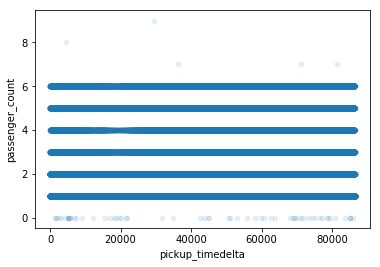

In [18]:
trips.where(trips["trip_duration"]<500000).plot(kind="scatter",x="pickup_timedelta",y="passenger_count",alpha=0.1)

In [40]:
trips["from_JFK"].unique()

array(['0'], dtype=object)